In [198]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import copy
% matplotlib inline

In [2]:
class bondcurve: #should probably set up for BRZ, VAle, braskm, gerdau, suzano. Highly rated BRZ
    
    yield_dictbid=dict() #just use year as maturity for now
    z_spdsbid=dict()
    
    yield_dictoff=dict() #set up as bid and offer rn though this is probably an unnecessary level of specificity
    z_spdsoff=dict()
    
    name=str()

In [154]:
valebz=bondcurve()
valebz.name='valebz'
gerdau=bondcurve()
gerdau.name='gerdau'
brz=bondcurve()
brz.name='brazil'
valebz.zspds_bid={21:3.0,28:4.023, 30:4.501}
gerdau.zspds_bid={21:3.2,27:4.0, 32:4.68}
brz.zspds_bid={21:2.5,22: 2.6, 27:4.0,30:4.6}
corps=[valebz,gerdau]
print(brz.zspds_bid.keys())

[30, 27, 21, 22]


In [184]:
def z_spread_monitor(corplist,sov, bidask): 
    
    sov_years=sov.zspds_bid.keys() #years that are available for sovereign years for zspd
    biglist=list() # will fill with differential dict by corporate
    sov_dict=dict()
    
    for year in sov_years:
        sov_dict['Ticker']=sov.name
        sov_dict['Differential']=0.0
        sov_dict['Maturity']=year
        sov_dict['z-spread']=sov.zspds_bid[year]
        
        biglist.append(sov_dict.copy())
        
    for item in corplist:
        corp_years=item.zspds_bid.keys() #list of maturity years of corp bonds
        mat_dict=dict() #list to populate with differentials, and maturities, will become full dict for row
        
        for year in corp_years: #should return dictionary of differentials by year
            corp_z= item.zspds_bid[year] #return z spread for selected year
            
            
            if year in sov_years:  #needs matching sov maturity
                sov_z= sov.zspds_bid[year]
                dif_z= corp_z-sov_z # will be positive if corp trades wide to sov
                
            elif year not in sov_years:
                substitute_year=closest_year(year,sov_years)
                dif_z=corp_z-sov.zspds_bid[substitute_year]
                
            mat_dict['Ticker']=item.name
            mat_dict['Differential']=dif_z
            mat_dict['Maturity']=year
            mat_dict['z-spread']=corp_z
                
            
            biglist.append(mat_dict.copy()) #add dictionary of differentials by year to biglist
            
    return(biglist)
            
def total_year_list(sov,corplist): #takes sov bond object and corplist and returns sorted list of all maturities
    
    total_years=sov.zspds_bid.keys()[:]
    
    for bondcurve in corplist:
        
        maturities=bondcurve.zspds_bid.keys()[:]
        
        for maturity in maturities:
            if maturity not in total_years:
                total_years.append(maturity)
    
    total_years=sorted(total_years)
    return (total_years)
                
def closest_year(year, year_list):
    
    year_dif=abs(year-year_list[0])
    close_year=int()
    
    
    for item in year_list:
        new_dif=year-item
        
        
        if abs(new_dif)<=year_dif:
            year_dif=abs(new_dif)
            close_year=item
    
    return(close_year)

def z_dict_to_df (corp_list, sov, bidask, order_columns): # will call z_spread_monitor function. order_columns is list
    
    df_input=z_spread_monitor(corp_list, sov, bidask)
    mydf=pd.DataFrame(df_input)
    mydf=mydf.sort_values(by=order_columns)
    mydf=mydf[['Maturity', 'Ticker', 'z-spread','Differential']]
    return(mydf)

def graph_curves(curve_list):
    
    for item in curve_list:
        plt.scatter(item.zspds_bid.keys(),item.zspds_bid.values(),label=item.name)
        
        
    plt.ylabel=('z-spread')
    plt.xlabel('maturity')
    plt.legend()
    plt.show()


In [185]:
#need to finish z-spd monitor. challenge will be grabbing closest sov yr for z_spd. Iterate through sov yrs and find
    # smallest differential. Also graph all curves and prime system for maintaining over time. Also evaluating spreads over time
    
z_dict_to_df(corps, brz,'bid',['Maturity','Ticker'])


,Maturity,Ticker,z-spread,Differential
2,21,brazil,2.500,0.000
9,21,gerdau,3.200,0.700
5,21,valebz,3.000,0.500
3,22,brazil,2.600,0.000
1,27,brazil,4.000,0.000
8,27,gerdau,4.000,0.000
4,28,valebz,4.023,0.023
0,30,brazil,4.600,0.000
6,30,valebz,4.501,-0.099
7,32,gerdau,4.680,0.080


<type 'list'>


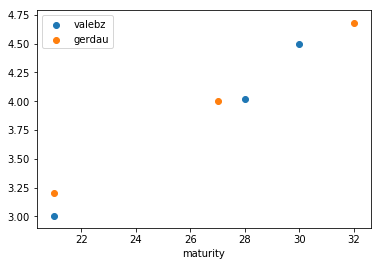

In [236]:
graph_curves(corps)